## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

### Set some options

In [2]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

## Loading the dataset

In [3]:
df = pd.read_csv('processed_cleveland.csv')

## Insights from the dataset

In [106]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(1), int64(11), object(2)
memory usage: 33.3+ KB


In [4]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
76,60,1,4,125,258,0,2,141,1,2.8,2,1,7,1
176,52,1,4,108,233,1,0,147,0,0.1,1,3,7,0
164,48,1,3,124,255,1,0,175,0,0.0,1,2,3,0
21,58,0,1,150,283,1,2,162,0,1.0,1,0,3,0
93,44,0,3,108,141,0,0,175,0,0.6,2,0,3,0


### Number of unique values in the datset

In [104]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
num           5
dtype: int64

In [105]:
df.sex.unique()

array([1, 0], dtype=int64)

In [24]:
df.cp.unique()

array([1, 4, 3, 2], dtype=int64)

In [25]:
df.fbs.unique()

array([1, 0], dtype=int64)

In [27]:
df.restecg.unique()

array([2, 0, 1], dtype=int64)

In [28]:
df.exang.unique()

array([0, 1], dtype=int64)

In [29]:
df.slope.unique()

array([3, 2, 1], dtype=int64)

In [30]:
df.ca.unique()

array(['0', '3', '2', '1', '?'], dtype=object)

In [31]:
df.thal.unique()

array(['6', '3', '7', '?'], dtype=object)

In [47]:
df.num.unique()

array([0, 2, 1, 3, 4], dtype=int64)

### Checking the balancing or imbalancing of the data

In [6]:
df.num.value_counts(True)

num
0    0.541254
1    0.181518
2    0.118812
3    0.115512
4    0.042904
Name: proportion, dtype: float64

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

### Converting object type feature `ca`,`thal` in numeric

In [129]:
df['thal'] = pd.to_numeric(df['thal'],errors='coerce')

In [130]:
df['ca'] = pd.to_numeric(df['ca'],errors = 'coerce')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


### Checking the null values

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

#### Checking the percentage of null values

In [43]:
(df.isnull().sum())/len(df)*100

age         0.000000
sex         0.000000
cp          0.000000
trestbps    0.000000
chol        0.000000
fbs         0.000000
restecg     0.000000
thalach     0.000000
exang       0.000000
oldpeak     0.000000
slope       0.000000
ca          1.320132
thal        0.660066
num         0.000000
dtype: float64

### Impute the null values

In [132]:
df.dropna(inplace=True)

### Checking the null values after imputation

In [133]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [46]:
df.shape

(297, 14)

### Outliers detection

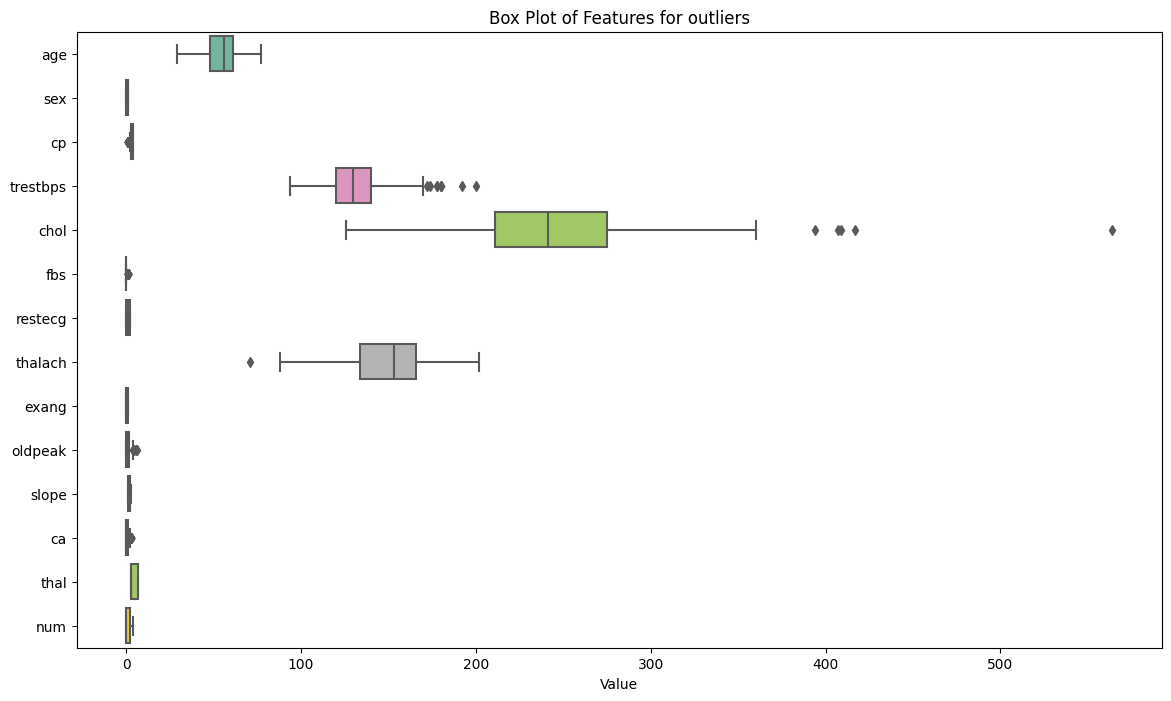

<Figure size 640x480 with 0 Axes>

In [17]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df,orient='h',palette='Set2')
plt.title("Box Plot of Features for outliers")
plt.xlabel("Value")
plt.show()
plt.tight_layout()

### Removing the outliers

In [134]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df.clip(lower=lower_bound,upper=upper_bound,axis=1)

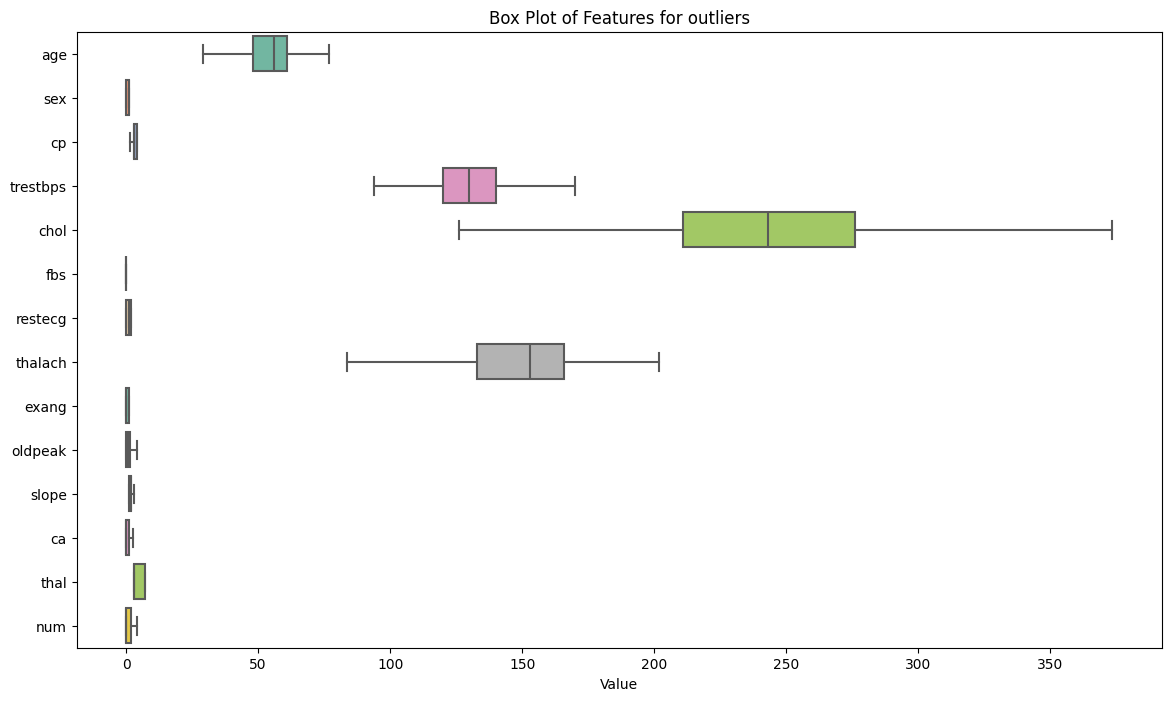

<Figure size 640x480 with 0 Axes>

In [135]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df,orient='h',palette='Set2')
plt.title("Box Plot of Features for outliers")
plt.xlabel("Value")
plt.show()
plt.tight_layout()

In [136]:
df.shape

(297, 14)

## EDA 

<Figure size 640x480 with 0 Axes>

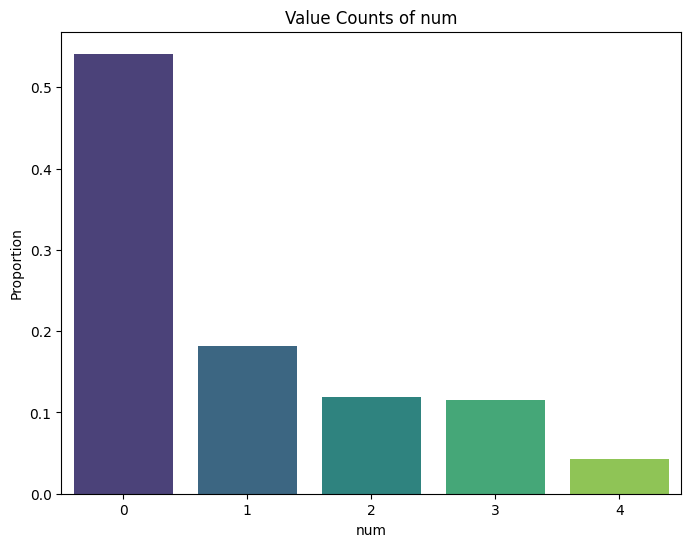

In [106]:
value_counts = df['num'].value_counts(normalize=True)

# Plot value counts
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
plt.xlabel('num')
plt.ylabel('Proportion')
plt.title('Value Counts of num')
plt.show()

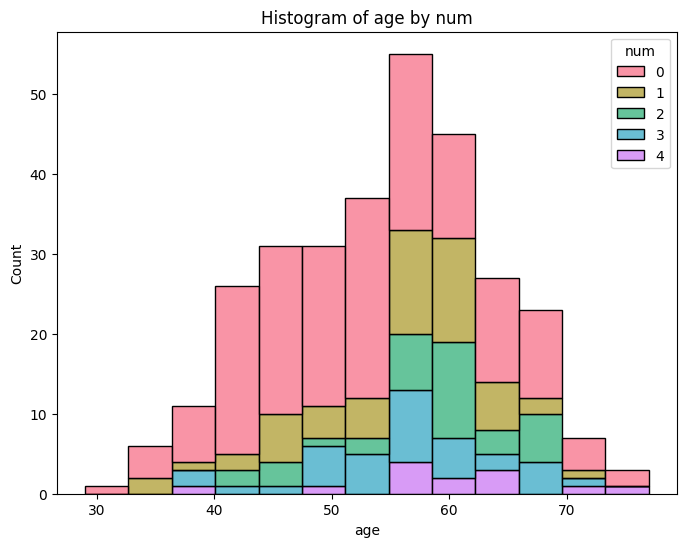

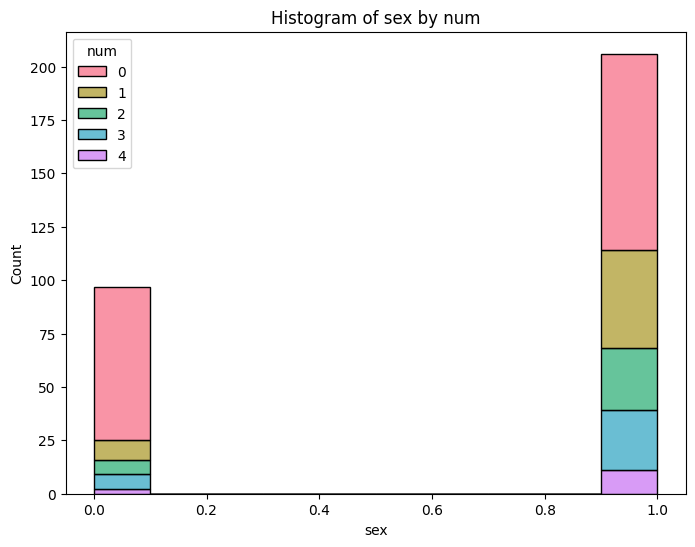

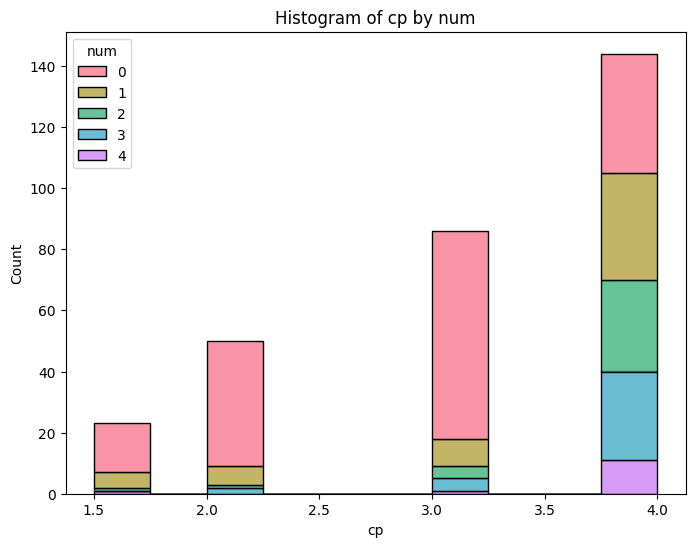

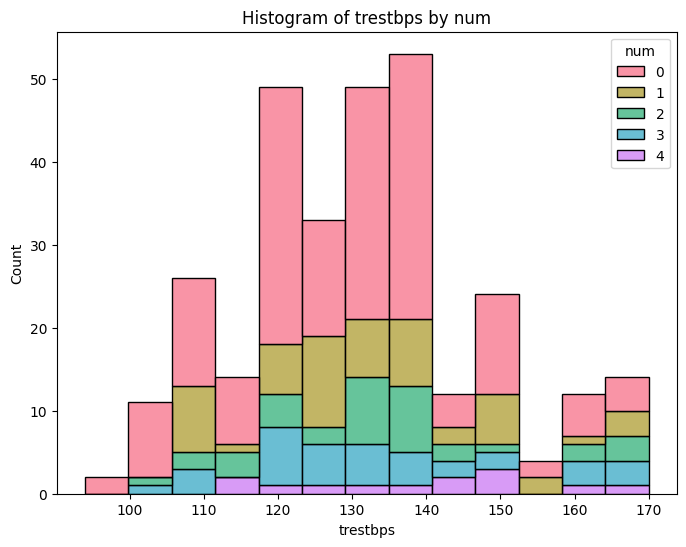

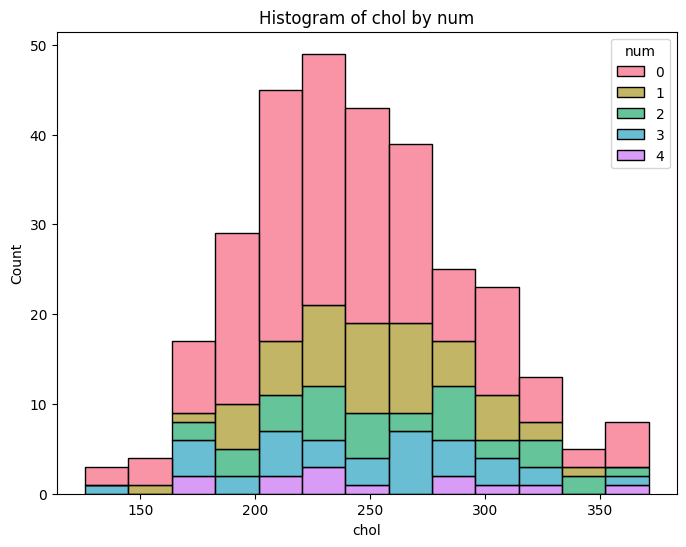

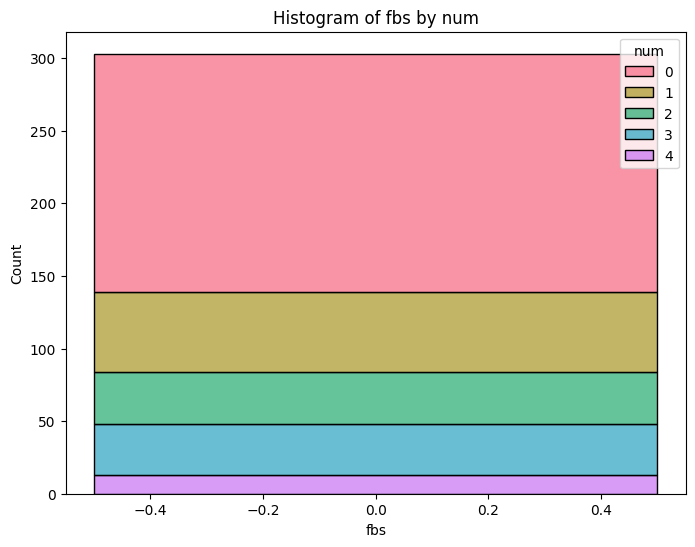

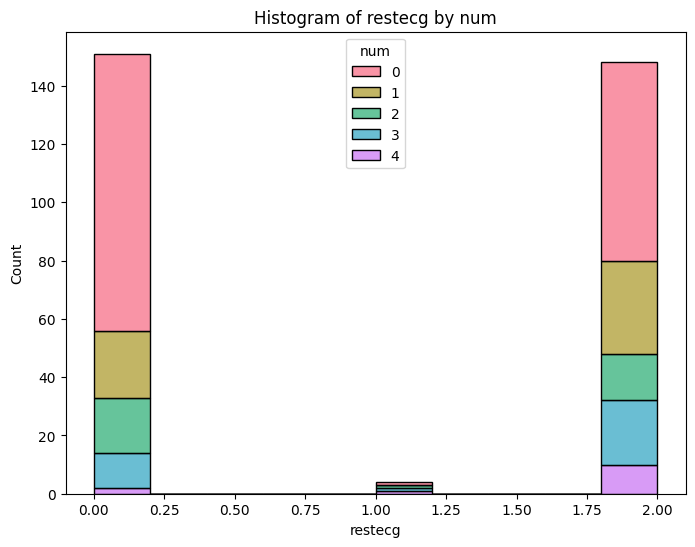

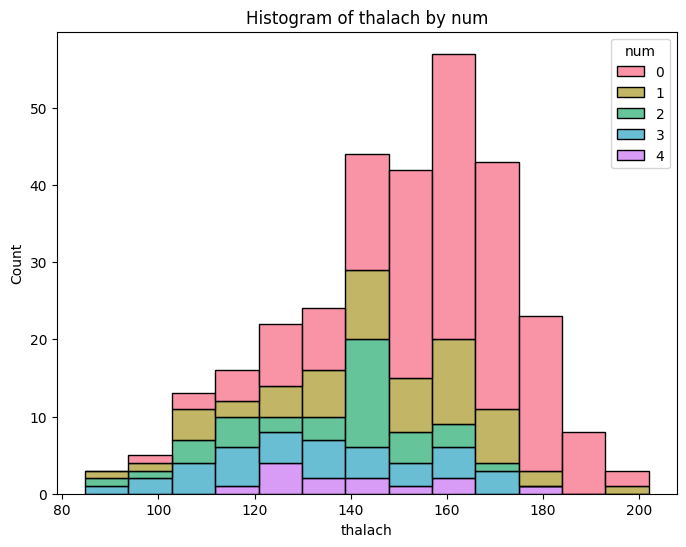

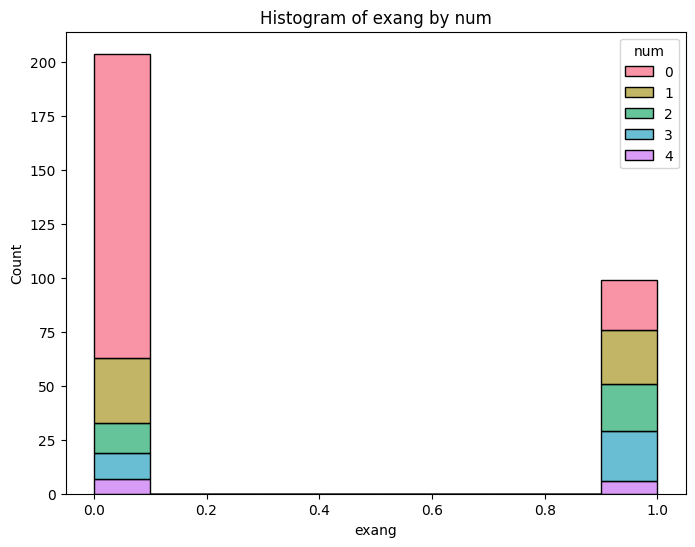

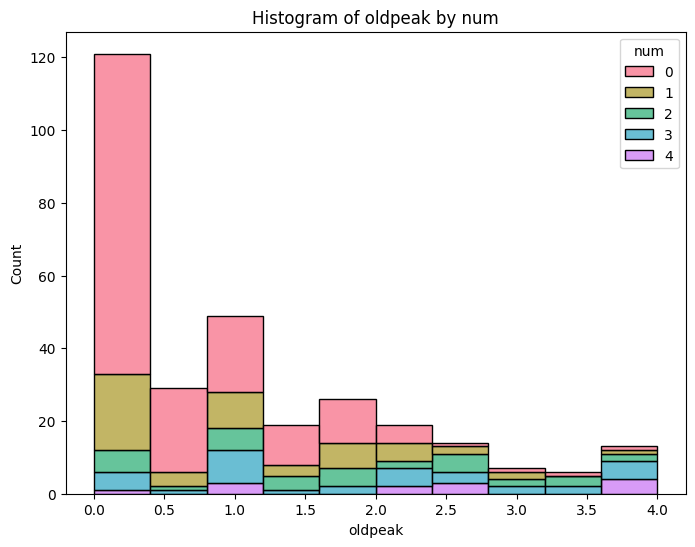

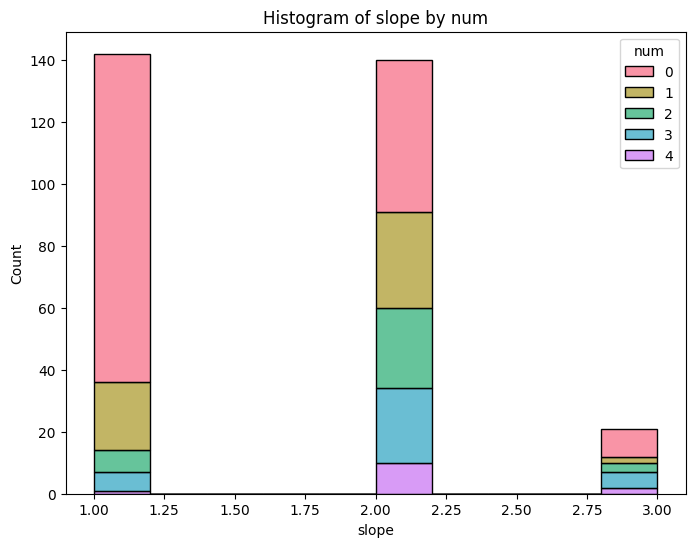

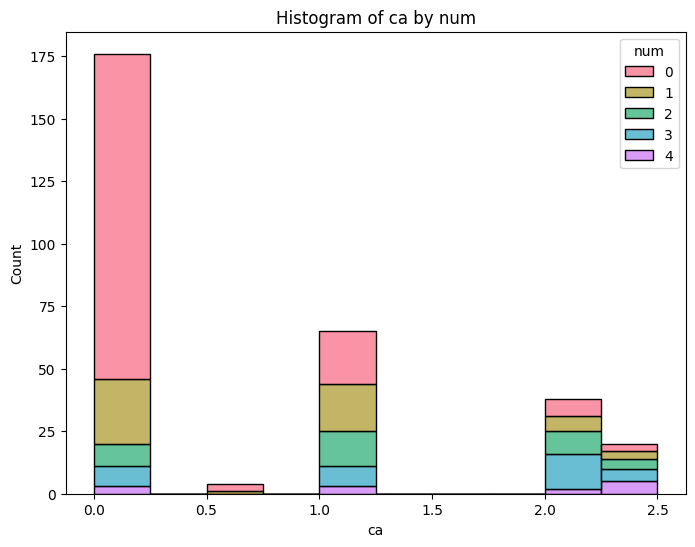

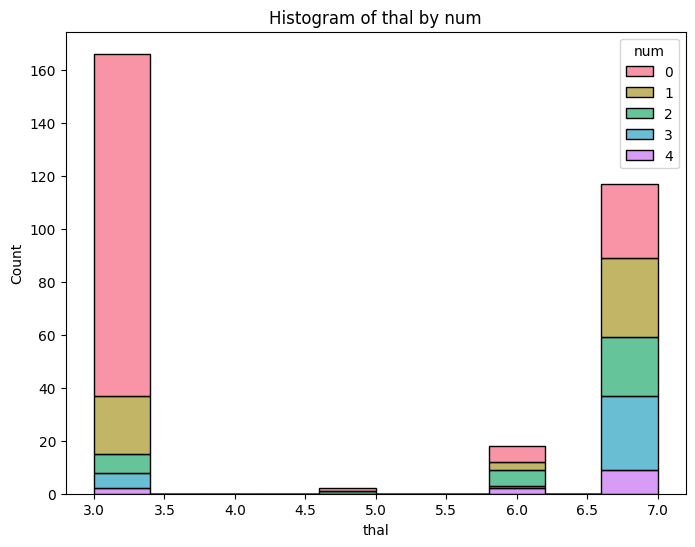

In [112]:
# List of features to plot
features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
            'exang', 'oldpeak', 'slope', 'ca', 'thal']


palette = sns.color_palette('husl', n_colors=len(df['num'].unique()))

# Plot histograms
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=feature, hue='num', multiple='stack',palette=palette)
    plt.title(f'Histogram of {feature} by num')
    plt.show()

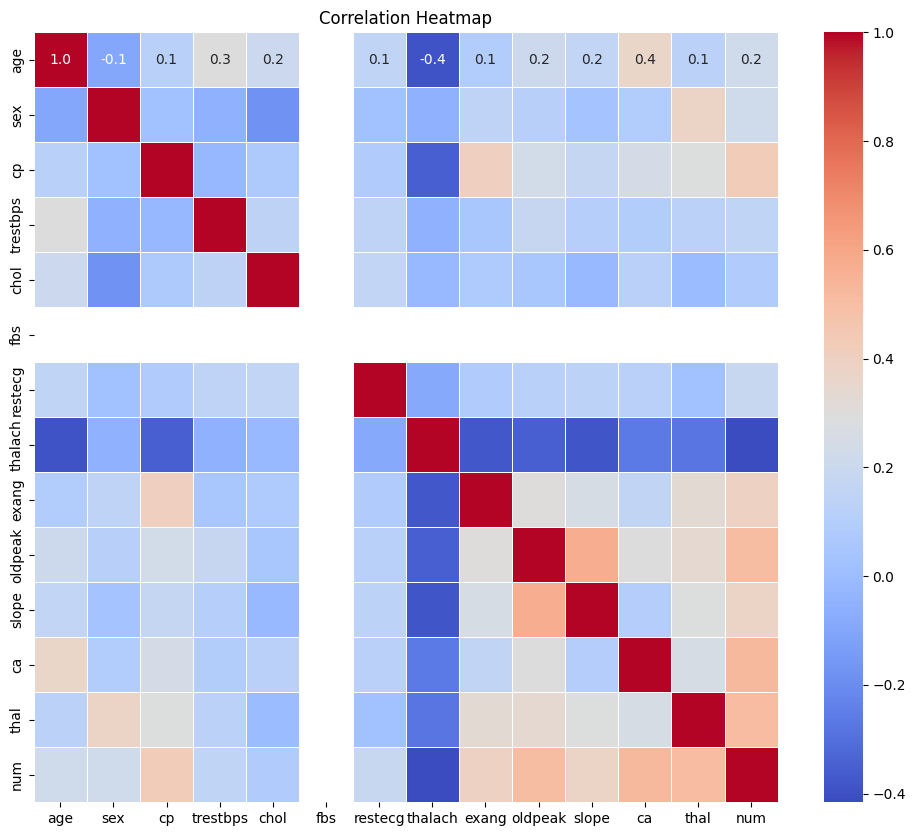

In [21]:
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.1f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Drop the irrelevent feature

In [137]:
df.drop(columns=['fbs'],inplace=True)

In [138]:
import plotly.express as px

# Compute the correlation matrix
corr = df.corr()

# Plot heatmap with a simplified setup
fig = px.imshow(corr, color_continuous_scale='viridis', text_auto=True)

fig.update_layout(
    width=1200,
    height=1000,
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis=dict(tickangle=-45),
    yaxis=dict(tickangle=0)
)

fig.show()


In [115]:
df.shape

(297, 13)

In [122]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

### separating the dependent and independent features

In [139]:
x = df.drop('num',axis=1)
y = df['num']

In [140]:
print(x.shape)
x.head()

(297, 12)


,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1.5,145,233.0,2,150.0,0,2.3,3,0.0,6.0
1,67,1,4.0,160,286.0,2,108.0,1,1.5,2,2.5,3.0
2,67,1,4.0,120,229.0,2,129.0,1,2.6,2,2.0,7.0
3,37,1,3.0,130,250.0,0,187.0,0,3.5,3,0.0,3.0
4,41,0,2.0,130,204.0,2,172.0,0,1.4,1,0.0,3.0


In [118]:
print(y.shape)
y.head()

(297,)


0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64

In [59]:
#Importing our ML toolkit
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.svm import SVC


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

### Splitting the data
- Training_data = 70%.
- Testing_data = 30%

In [141]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, y_train.shape

((207, 12), (207,))

### Apply over_sampling

In [142]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_resampled,y_resampled = smote.fit_resample(x_train,y_train)

In [121]:
y_resampled.value_counts(True)

num
1    0.2
0    0.2
2    0.2
3    0.2
4    0.2
Name: proportion, dtype: float64

### Scalling the data

In [184]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_resampled)
x_test = scaler.fit_transform(x_test)

In [185]:
x_train=pd.DataFrame(x_train,columns=x.columns)
x_train.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.666667,1.0,1.0,0.605263,0.327273,1.0,0.459916,1.0,0.475,0.0,0.4,1.00
1,0.583333,1.0,1.0,0.736842,0.606061,1.0,0.240506,1.0,0.150,0.5,0.4,0.75
2,0.395833,1.0,0.2,0.210526,0.416162,0.0,0.713080,0.0,0.250,1.0,0.0,1.00
3,0.791667,0.0,1.0,0.157895,0.391919,0.0,0.493671,0.0,0.075,0.0,0.8,0.00
4,0.375000,1.0,0.6,0.184211,0.472727,0.0,0.578059,0.0,0.000,0.0,0.0,0.00


## DecisionTreeClassifier

In [196]:
model = DecisionTreeClassifier()
model.fit(x_train,y_resampled)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy

53.33

In [187]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.71      0.90      0.80        39
           1       0.24      0.27      0.25        15
           2       0.40      0.44      0.42         9
           3       0.64      0.28      0.39        25
           4       0.00      0.00      0.00         2

    accuracy                           0.56        90
   macro avg       0.40      0.38      0.37        90
weighted avg       0.57      0.56      0.54        90



### RandomForestClassifer

In [206]:
model = RandomForestClassifier()
model.fit(x_train,y_resampled)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy

51.11

### GradientBoostingClassifier

In [195]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_resampled,y_resampled)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy

48.89

### KNeghiboursClassifier

In [198]:
model = KNeighborsClassifier()
model.fit(x_train,y_resampled)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy

48.89

### AdaBoostClassifer

In [199]:
model = AdaBoostClassifier()
model.fit(x_train,y_resampled)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy

51.11

### XGBClassifier

In [200]:
model = XGBClassifier()
model.fit(x_train,y_resampled)
y_pred = model.predict(x_test)
accuracy = np.round(accuracy_score(y_pred,y_test)*100,2)
accuracy

53.33